In [2]:
import numpy as np
import torch
import torch.nn as nn

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

In [23]:
class Perceptron(nn.Module):
    """
    A perceptron is one linear layer 
    """
    
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """The forward pass of the perceptron

        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,).
            
        Example:
        
        Input : torch.Tensor([[1,2,3,4,5],
                            [6,7,8,9,10]])
                            
        Output : (Without Squeeze) tensor([[-2.4775],
                        [-5.4294]], grad_fn=<AddmmBackward>)
                        
                (After Squeeze) [-2.0789, -5.4392]
                        
        """                
        return torch.sigmoid(self.fc1(x_in)).squeeze()

In [22]:
nn.Linear(5, 1)(torch.Tensor([[1,2,3,4,5],
                            [6,7,8,9,10]])).squeeze()

tensor([-2.0789, -5.4392], grad_fn=<SqueezeBackward0>)

## Examples - Activation Functions

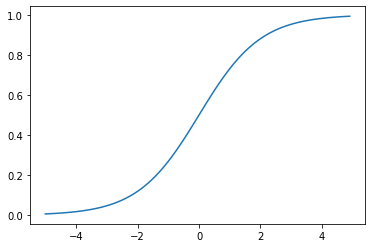

In [33]:

import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

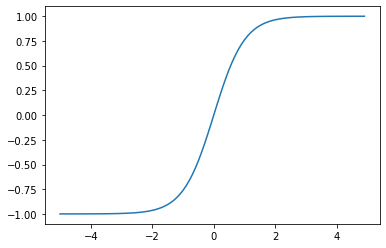

In [34]:
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

In [43]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.0103, -1.4505, -0.4860]])
tensor([[0.5432, 0.1261, 0.3307]])
tensor([1.0000])


## Loss Functions

In [44]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
#loss.backward()
print(loss)

tensor(1.9918, grad_fn=<MseLossBackward>)


In [47]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
loss.backward()
print (loss)

tensor(1.9786, grad_fn=<NllLossBackward>)


In [49]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
print(probabilities)

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
loss.backward()
print(loss)

tensor([[0.7083],
        [0.7139],
        [0.4481],
        [0.7490]], grad_fn=<SigmoidBackward>)
tensor(0.9452, grad_fn=<BinaryCrossEntropyBackward>)


In [50]:
np.random.normal(loc=(3,3))

array([2.29681269, 2.50971764])

In [52]:
torch.tensor([(3,3), (4,4)], dtype=torch.float32)

tensor([[3., 3.],
        [4., 4.]])